In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# Step 1: Load the data
data = pd.read_csv('./Dummy Data HSS.csv')

In [7]:
data

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16.0,6.566231,2.907983,54.732757,False,True,False,False
1,13.0,9.237765,2.409567,46.677897,False,True,False,False
2,41.0,15.886446,2.913410,150.177829,False,True,False,False
3,83.0,30.020028,6.922304,298.246340,False,True,False,False
4,15.0,8.437408,1.405998,56.594181,False,False,True,False
...,...,...,...,...,...,...,...,...
4567,26.0,4.472360,0.717090,94.685866,False,False,True,False
4568,71.0,20.610685,6.545573,249.101915,False,False,False,True
4569,44.0,19.800072,5.096192,163.631457,False,False,True,False
4570,71.0,17.534640,1.940873,253.610411,True,False,False,False


In [18]:


# Step 2: Preprocess the data
data = pd.get_dummies(data)  # Convert categorical variables to numerical using one-hot encoding

# Remove rows with missing target values (NaNs)
data = data.dropna(subset=['Sales'])

X = data.drop('Sales', axis=1)
y = data['Sales']

# Step 3: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Model
model = HistGradientBoostingRegressor()
model.fit(X_train, y_train)

# Step 5: Predict Sales
y_pred = model.predict(X_test)

# Step 6: Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Step 7: Tune Hyperparameters (Optional)
# You can use techniques like GridSearchCV or RandomizedSearchCV to find the best hyperparameters


Mean Absolute Error: 2.6013535353551966


In [19]:
import numpy as np
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


Mean Squared Error: 16.074169825934234
Root Mean Squared Error: 4.009260508614305


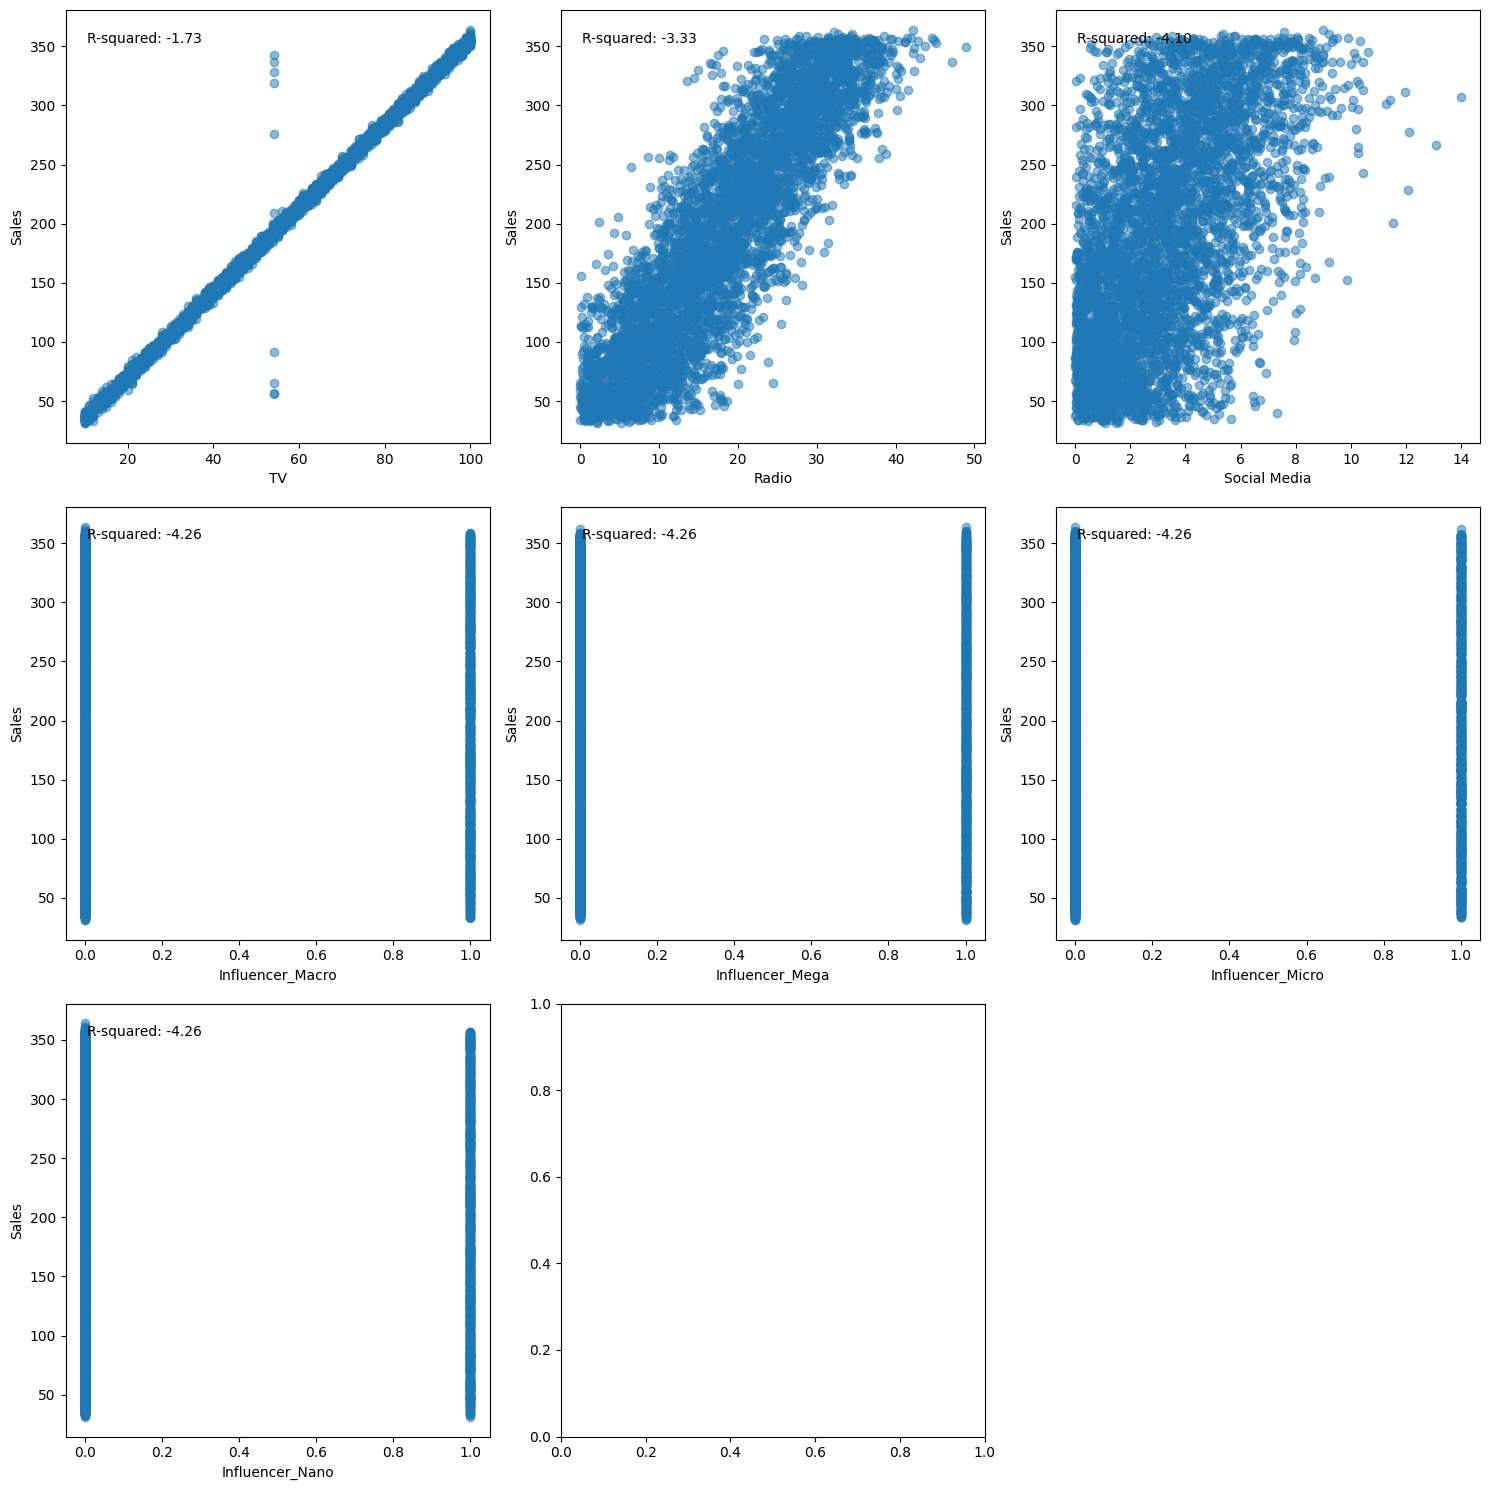

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer

# Step 1: Load the data
data = pd.read_csv('./Dummy Data HSS.csv')

# Step 2: Preprocess the data
data = pd.get_dummies(data)  # Convert categorical variables to numerical using one-hot encoding

# Remove rows with missing target values (NaNs)
data = data.dropna(subset=['Sales'])

X = data.drop('Sales', axis=1)
y = data['Sales']

# Step 3: Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

# Step 4: Calculate R-squared for all features
r2_scores = {}
for col in X_imputed.columns:
    r2_scores[col] = r2_score(y, X_imputed[col])

# Step 5: Create scatter plots for each feature
num_features = len(X_imputed.columns)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate number of rows based on number of features

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, col in enumerate(X_imputed.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    axes[row_idx, col_idx].scatter(X_imputed[col], y, alpha=0.5)
    axes[row_idx, col_idx].set_xlabel(col)
    axes[row_idx, col_idx].set_ylabel('Sales')
    axes[row_idx, col_idx].text(0.05, 0.95, f'R-squared: {r2_scores[col]:.2f}', transform=axes[row_idx, col_idx].transAxes,
                                 verticalalignment='top')

# Remove empty subplots if the number of features is not a multiple of num_cols
if num_cols * num_rows > num_features:
    for i in range(num_cols * num_rows - num_features, num_cols):
        fig.delaxes(axes[num_rows - 1, i])

plt.tight_layout()
plt.show()


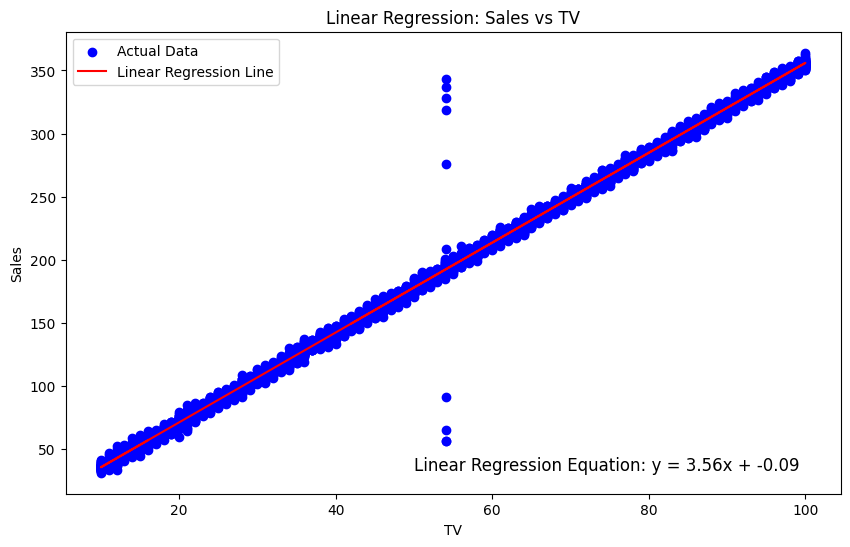

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Step 1: Load the data
data = pd.read_csv('./Dummy Data HSS.csv')

# Step 2: Preprocess the data
data = pd.get_dummies(data)  # Convert categorical variables to numerical using one-hot encoding

# Remove rows with missing target values (NaNs)
data = data.dropna(subset=['Sales'])

# Extract 'TV' and 'Sales' columns
X = data['TV'].values.reshape(-1, 1)  # Reshape to 2D array for single feature
y = data['Sales']

# Step 3: Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Step 4: Create and fit the linear regression model
model = LinearRegression()
model.fit(X_imputed, y)

# Step 5: Make predictions using the model
y_pred = model.predict(X_imputed)

# Step 6: Plot the scatter plot and linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_imputed, y, color='blue', label='Actual Data')
plt.plot(X_imputed, y_pred, color='red', label='Linear Regression Line')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Linear Regression: Sales vs TV')
plt.legend()

# Step 7: Print the linear regression equation on the plot
plt.text(0.45, 0.08, f'Linear Regression Equation: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.show()
